# Proceso  de EDA para estudiar los datos, y preparacion para hacer un modelo de recomendacion

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gzip


## Steam Games

In [2]:
steam_games = pd.read_csv('../datasets/steam_games.csv')

In [3]:
steam_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27834 entries, 0 to 27833
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   app_name                   27834 non-null  object 
 1   price                      27834 non-null  float64
 2   id                         27834 non-null  int64  
 3   developer                  27834 non-null  object 
 4   Accounting                 27834 non-null  int64  
 5   Action                     27834 non-null  int64  
 6   Adventure                  27834 non-null  int64  
 7   Animation &amp; Modeling   27834 non-null  int64  
 8   Audio Production           27834 non-null  int64  
 9   Casual                     27834 non-null  int64  
 10  Design &amp; Illustration  27834 non-null  int64  
 11  Early Access               27834 non-null  int64  
 12  Education                  27834 non-null  int64  
 13  Free to Play               27834 non-null  int

In [4]:
steam_games[['price','Year']].describe()
## El año va entre 1989 y 2021

,price,Year
count,27834.000000,27820.000000
mean,8.947923,2014.853810
std,15.996668,3.275912
min,0.000000,1983.000000
25%,2.990000,2014.000000
50%,4.990000,2016.000000
75%,9.990000,2017.000000
max,995.000000,2021.000000


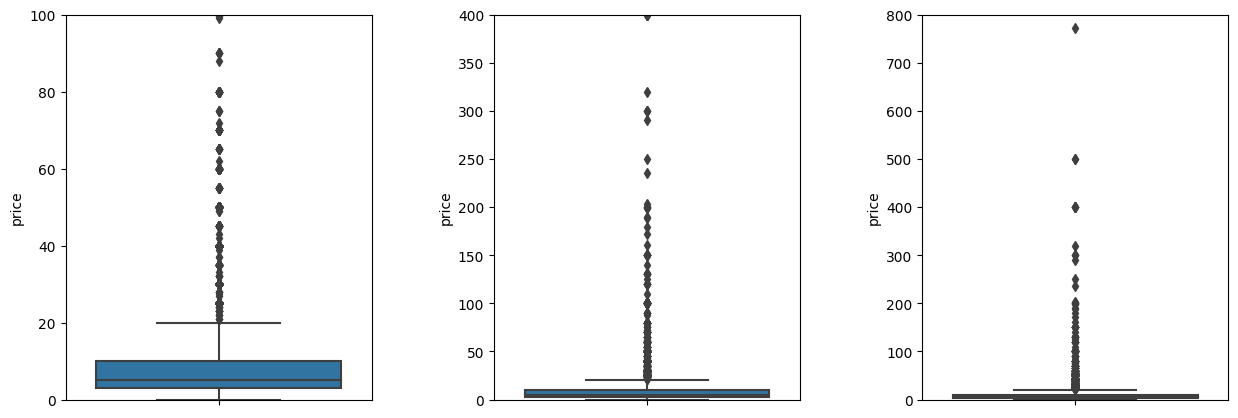

In [5]:

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.boxplot(data=steam_games, y='price', ax=ax[0])
sns.boxplot(data=steam_games, y='price', ax=ax[1])
sns.boxplot(data=steam_games, y='price', ax=ax[2])
ax[0].set_ylim(0, 100)
ax[1].set_ylim(0, 400)
ax[2].set_ylim(0, 800)

plt.subplots_adjust(wspace=0.4)
plt.show()


### En el grafico se puede ver que la columna price tiene muchos valores atipicos que superan los 20 y llegan a los 1000, sin embargo en una app de juegos es posible tener tal distribucion, es decir muchos juegos de precio bajo y varios de precio alto por esto no se hara un tratado especial

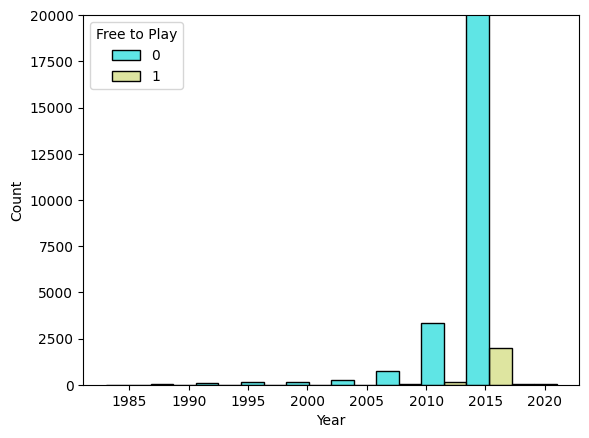

In [6]:
sns.histplot(data=steam_games,x='Year',hue='Free to Play',bins=10,palette='rainbow',multiple='dodge')

plt.ylim(0,20000)
plt.show()

### 2015 es el año con mas juegos y mas juegos Free To Play

In [7]:
generos = list(steam_games.drop(columns=['app_name','price','id','developer','Accounting','Year']).columns)

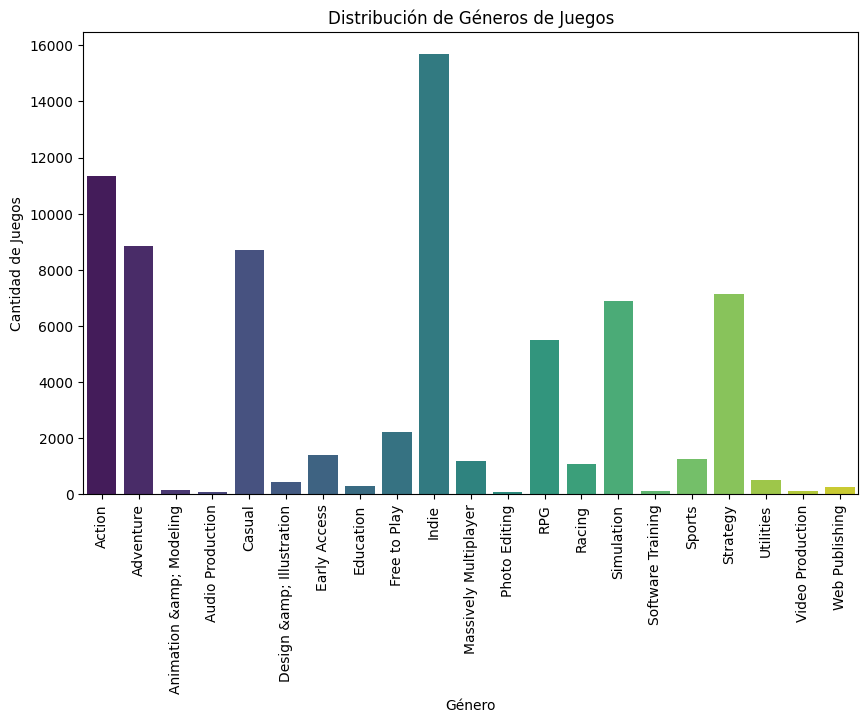

In [8]:
genre_counts = steam_games[generos].sum()
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')

# Configurar etiquetas y título
plt.xlabel('Género')
plt.ylabel('Cantidad de Juegos')
plt.title('Distribución de Géneros de Juegos')
plt.xticks(rotation=90)  # Rotar etiquetas del eje x para mayor legibilidad
# Mostrar el gráfico
plt.show()


## Users Reviews

In [9]:
user_review = pd.read_csv('../datasets/user_reviews.csv')

In [10]:
user_review.sample(5)

,user_id,posted,item_id,recommend,sentiment_analysis
8391,76561198051306831,"Posted June 5, 2015.",730,True,1
35690,opw,"Posted September 15, 2014.",218620,True,1
59236,112367263762,Posted July 31.,304050,False,1
9413,bow47,"Posted December 18, 2014.",335330,False,1
4496,olismeister,Posted September 5.,304930,True,2


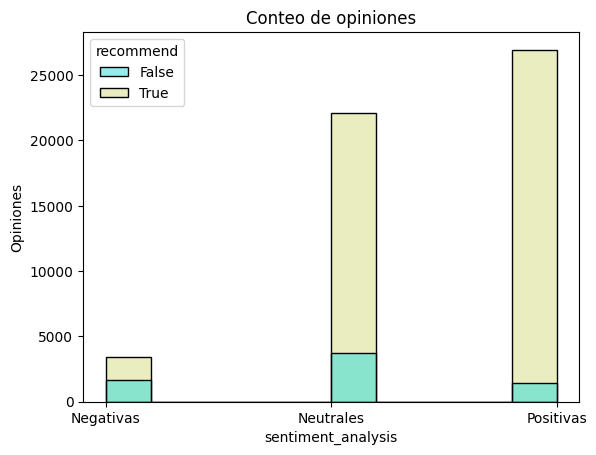

In [11]:
sns.histplot(data=user_review,x='sentiment_analysis',bins=10,palette='rainbow',hue='recommend')
plt.title('Conteo de opiniones')
plt.xticks(ticks=[0, 1, 2], labels=['Negativas', 'Neutrales', 'Positivas'])
plt.ylabel('Opiniones')
plt.show()

### Como se ve del total de sentimiento malos, un alto porcentaje son recomendaciones falsas, y de los buenos el total de recomendaciones true son altas, Para ambas hay un porcentaje existente de recomendaciones que parecen opuesta al sentimiento

## Users Items

In [12]:
with gzip.open('../datasets/user_items_proc.csv.gz', 'rb') as f:
    user_items_proc = pd.read_csv(f, encoding='utf-8')

In [13]:
user_items_proc.sample(5)

,user_id,items_count,steam_id,user_url,item_id,item_name,playtime_forever,playtime_2weeks
3375318,76561198071957360,75,76561198071957360,http://steamcommunity.com/profiles/76561198071...,230410.0,Warframe,1591.0,0.0
646114,AlmightyShippo,747,76561197994271725,http://steamcommunity.com/id/AlmightyShippo,286340.0,FarSky,421.0,0.0
2597565,Porjate,385,76561198041823841,http://steamcommunity.com/id/Porjate,94400.0,Nidhogg,485.0,0.0
1086893,guppytko,60,76561198042334930,http://steamcommunity.com/id/guppytko,245550.0,Free to Play,3.0,0.0
4138492,76561198028030617,32,76561198028030617,http://steamcommunity.com/profiles/76561198028...,20570.0,"Warhammer¬Æ 40,000‚Ñ¢: Dawn of War¬Æ II - Chao...",1393.0,0.0


In [14]:
user_items_proc['playtime_forever'].describe()

count    5.153209e+06
mean     9.914951e+02
std      5.418204e+03
min      0.000000e+00
25%      0.000000e+00
50%      3.400000e+01
75%      3.550000e+02
max      6.427730e+05
Name: playtime_forever, dtype: float64

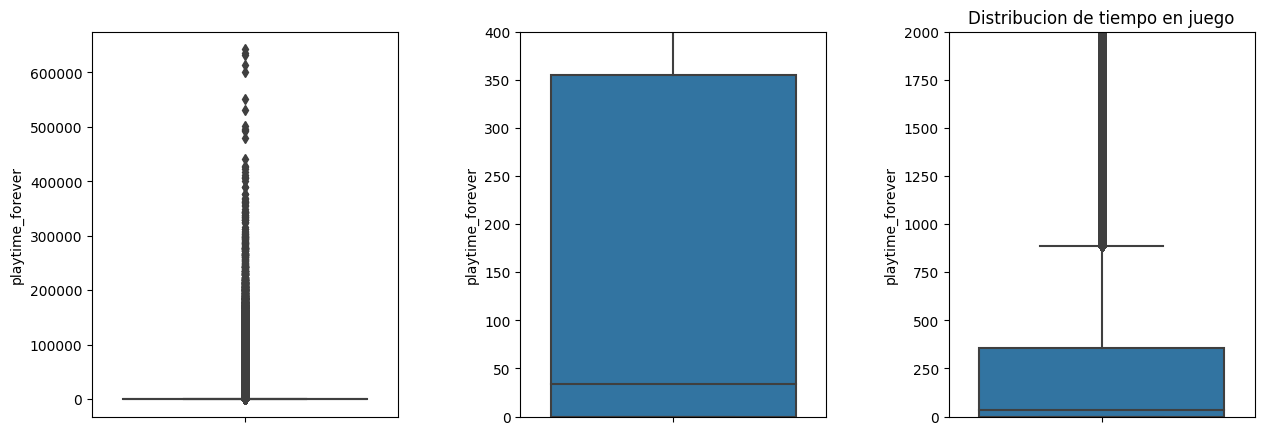

In [15]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.boxplot(data=user_items_proc, y='playtime_forever', ax=ax[0])
sns.boxplot(data=user_items_proc, y='playtime_forever', ax=ax[1])
sns.boxplot(data=user_items_proc, y='playtime_forever', ax=ax[2])
ax[1].set_ylim(0, 400)
ax[2].set_ylim(0, 2000)
plt.title('Distribucion de tiempo en juego')
plt.subplots_adjust(wspace=0.4)
plt.show()


### Hay valores atipicos de playtime_forever pero solo se hara un tratado si se encuentra un valor que supere la cantidad de minutos entre que salio el juego y la fecha actual.

In [14]:

# Agregando los comentarios explicativos
# Unimos los dataframes 'steam_games' y 'user_items_proc' basado en 'id' y 'item_id' respectivamente.
games_users = pd.merge(steam_games[['id','Year']], user_items_proc[['item_id','playtime_forever']], left_on='id', right_on='item_id', how='inner')

# Buscamos los valores erróneos en la columna 'playtime_forever' donde el tiempo de juego es mayor que la edad del juego en minutos
# Suponemos que cada año tiene 365 días, cada día 24 horas, cada hora 60 minutos
valores_playtime_erroneos = games_users[(2021 - games_users['Year'])*365*24*60 < games_users['playtime_forever']]

valores_playtime_erroneos # Como se ve es vacio, significa que no hay valores erróneos.
valores_playtime_erroneos # Como se ve es vacio.

,id,Year,item_id,playtime_forever


### Se podria analisar de forma que a menos cantidad de items mas tiempo consume un usuario un juego especifico, esto podria ayudar a explicar porque los valores atipicos no son necesariamente erroneos.

In [16]:
playtime_poritem = user_items_proc.groupby('item_id')['playtime_forever'].sum().div(60).reset_index()
playtime_poritem
games_playtime = pd.merge(steam_games,playtime_poritem,left_on='id',right_on='item_id',how='inner')
games_playtime.sample(5)

,app_name,price,id,developer,Accounting,Action,Adventure,Animation &amp; Modeling,Audio Production,Casual,...,Simulation,Software Training,Sports,Strategy,Utilities,Video Production,Web Publishing,Year,item_id,playtime_forever
5551,Planet Alcatraz 2,4.99,389250,1C Company,0,0,1,0,0,0,...,0,0,0,0,0,0,0,2008.0,389250.0,9.433333
5420,Lumini,12.99,360840,Speelbaars,0,0,1,0,0,0,...,1,0,0,0,0,0,0,2015.0,360840.0,9.500000
4081,BomberZone,1.99,473140,Dracula Bytes,0,1,0,0,0,1,...,0,0,0,0,0,0,0,2016.0,473140.0,17.733333
4890,Gnumz: Masters of Defense,4.99,371460,Creobit,0,0,0,0,0,1,...,0,0,0,1,0,0,0,2015.0,371460.0,100.900000
3253,Cubway,3.99,511160,Armnomads LLC,0,1,1,0,0,0,...,0,0,0,0,0,0,0,2016.0,511160.0,0.383333


In [17]:
# Ordena el DataFrame 'games_playtime' en orden descendente por la columna 'playtime_forever'
games_playtime.sort_values(ascending=False,by='playtime_forever',inplace=True)

# Selecciona las primeras 15 filas después de ordenar y los almacena en 'best_hours15'
best_hours15 = games_playtime.head(15)

# Muestra las primeras 5 filas de 'best_hours15'
best_hours15.head(5)

,app_name,price,id,developer,Accounting,Action,Adventure,Animation &amp; Modeling,Audio Production,Casual,...,Simulation,Software Training,Sports,Strategy,Utilities,Video Production,Web Publishing,Year,item_id,playtime_forever
601,Counter-Strike: Global Offensive,14.99,730,Valve,0,1,0,0,0,0,...,0,0,0,1,0,0,0,2012.0,730.0,1.308640e+07
8,Garry's Mod,9.99,4000,Facepunch Studios,0,1,1,0,0,0,...,1,0,0,0,0,0,0,2006.0,4000.0,7.472777e+06
7990,Terraria,9.99,105600,Re-Logic,0,1,1,0,0,0,...,0,0,0,0,0,0,0,2011.0,105600.0,2.582909e+06
7634,Warframe,0.00,230410,Digital Extremes,0,1,0,0,0,0,...,0,0,0,0,0,0,0,2013.0,230410.0,2.067128e+06
8507,Counter-Strike: Source,19.99,240,Valve,0,1,0,0,0,0,...,1,0,0,1,0,0,0,2004.0,240.0,1.876867e+06


### A partir del dataframe con la los rangink de juegos por horas jugadas voy a graficar

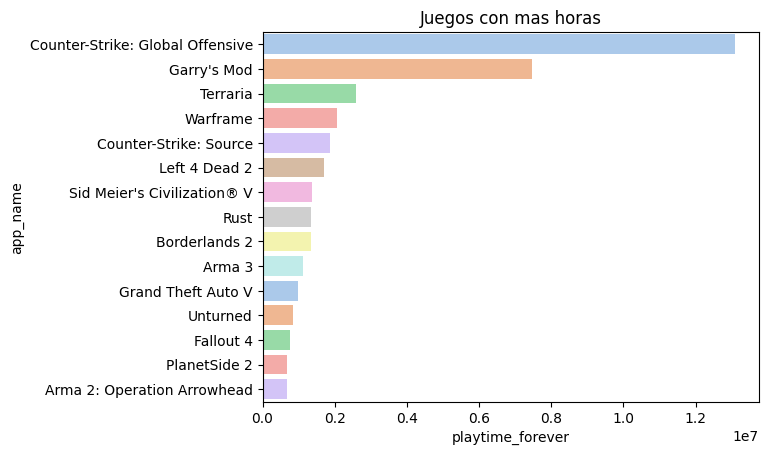

In [18]:
sns.barplot(data=best_hours15,y='app_name',x='playtime_forever',palette='pastel')
plt.title('Juegos con mas horas')
plt.show()

### Ahora voy a grupar por developer

In [19]:
# Agrupar los datos por 'developer' y calcular la suma de 'playtime_forever'.
games_playtime_dev = games_playtime.groupby('developer')['playtime_forever'].sum().reset_index()

# Ordenar los datos en orden descendente por 'playtime_forever'.
games_playtime_dev.sort_values(ascending=False,by='playtime_forever',inplace=True)

# Seleccionar los 15 'developer' con más tiempo de juego acumulado.
best_games_playtime_dev = games_playtime_dev.head(15)

# Mostrar los primeros 5 'developer' con más tiempo de juego.
best_games_playtime_dev.head(5)

,developer,playtime_forever
5070,Valve,1.824512e+07
1671,Facepunch Studios,8.824784e+06
3843,Re-Logic,2.582909e+06
672,Bohemia Interactive,2.445825e+06
1334,Digital Extremes,2.079624e+06


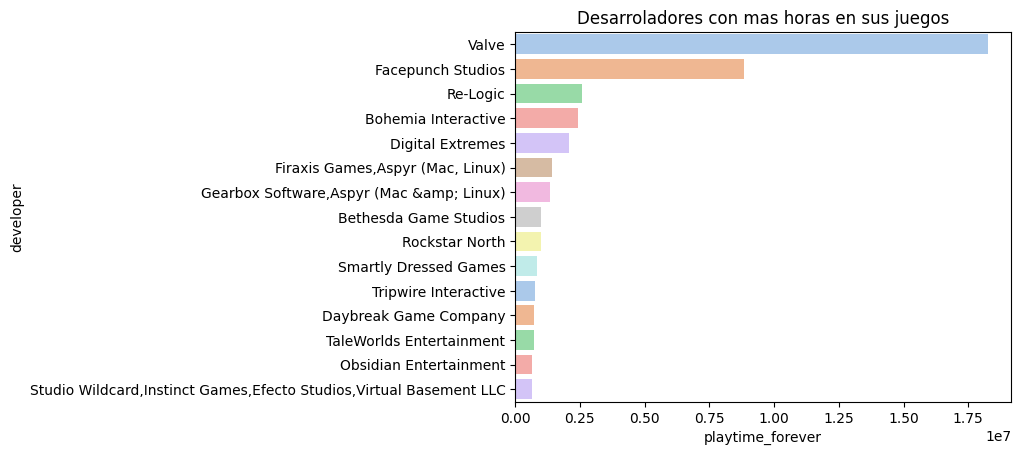

In [20]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Here sns.barplot function is used for representing some data in an informative way.
# Data for our graph is taken from best_games_playtime_dev dataset.
# The y axis represents developers while the x axis represents playtime forever.
sns.barplot(data=best_games_playtime_dev,y='developer',x='playtime_forever',palette='pastel')

# Set the title for our graph.
plt.title('Desarroladores con mas horas en sus juegos')

# Displaying the final graph.
plt.show()

### Ahora a partir de user_review voy a sumar la cantidad de recomendaciones positivas.


In [21]:
# Agrupamos las reseñas de usuarios por 'item_id' y aplicamos una transformación de 'recommend'
user_review_cop = user_review
user_review_cop['recommend'] = user_review['recommend'].apply(lambda x:1 if x else -1) # Recomendaciones positivas suma y negativas resta
user_review_rec = user_review_cop.groupby('item_id')['recommend'].sum().reset_index()

# Unimos los dataframes 'steam_games' y 'user_review_rec' en la columna 'id' e 'item_id', respectivamente
games_recommend = pd.merge(steam_games,user_review_rec,left_on='id',right_on='item_id',how='inner')

# Agregamos las recomendaciones por desarrollador
games_recommend = games_recommend.groupby('developer')['recommend'].sum().reset_index()

# Ordenamos los valores en orden descendente para obtener los mejores recomendados
games_recommend.sort_values(ascending=False,by='recommend',inplace=True) # Obtengo las mejores recomendaciones

# Tomamos los primeros 15 resultados
games_recommend_best = games_recommend.head(15)

# Mostramos los primeros 5 resultados
games_recommend_best.head(5)

,developer,recommend
1936,Valve,8728
639,Facepunch Studios,2224
1628,Smartly Dressed Games,888
250,Bohemia Interactive,749
1433,Re-Logic,705


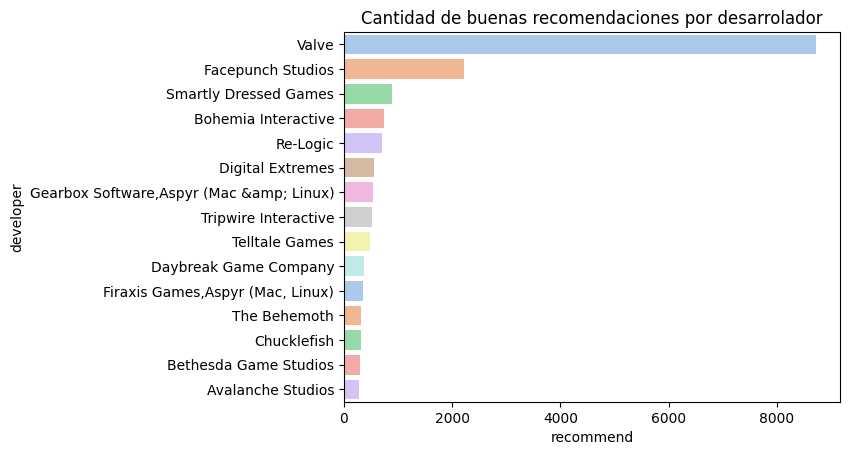

In [22]:
sns.barplot(data=games_recommend_best,x='recommend',y='developer',palette='pastel')
plt.title('Cantidad de buenas recomendaciones por desarrolador')
plt.show()